# Vetorização de palavras

TF-IDF (frenquency-inverse document frequency)
* Medida estatística para ponderar o valor das palavras em vez de simplesmente contá-las.
* Utilizada para determinar quão importante uma palavra é dada uma coleção de documentos.
* Representação bag-of-words (BoW) do texto que descreve a ocorrência das palavras em um texto do corpus.
* Não considera a sequência das palavras

In [ ]:
#fonte: https://github.com/rafaelstojoao/pos-unip/blob/master/codes/PLN/aula02/Classifica%C3%A7%C3%A3o.ipynb

import pandas as pd

columns = ['sent', 'class']
rows = []

# frases acertivas e interrogativas
rows = [['This is my book', 'stmt'], 
        ['They are novels', 'stmt'],
        ['have you read this book', 'question'],
        ['who is the author', 'question'],
        ['what are the characters', 'question'],
        ['This is how I bought the book', 'stmt'],
        ['I like fictions', 'stmt'],
        ['what is your favorite book', 'question']]

# criando o dataframe 
training_data = pd.DataFrame(rows, columns=columns)
training_data

,sent,class
0,This is my book,stmt
1,They are novels,stmt
2,have you read this book,question
3,who is the author,question
4,what are the characters,question
5,This is how I bought the book,stmt
6,I like fictions,stmt
7,what is your favorite book,question


In [ ]:
# Modulo para converter uma coleção de textos em uma matriz de contagem de tokens
from sklearn.feature_extraction.text import CountVectorizer


# iterrow(): retorna um iterator das linhas como pares (index, Series)
stmt_docs = [row['sent'] for index,row in training_data.iterrows() if row['class'] == 'stmt']

# Gera o vetor de ocorrências das palavras para o smtm (acertivas)
vec_s = CountVectorizer()
# aprende o vacabulário e retorna a matriz de termos do documento
X_s = vec_s.fit_transform(stmt_docs)
# Cria um um dataframs com os termos e a frequência de ocorrôncia das palavras
tdm_s = pd.DataFrame(X_s.toarray(), columns=vec_s.get_feature_names())

tdm_s

,are,book,bought,fictions,how,is,like,my,novels,the,they,this
0,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0
2,0,1,1,0,1,1,0,0,0,1,0,1
3,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
# repete passos anteriores para question
q_docs = [row['sent'] for index,row in training_data.iterrows() if row['class'] == 'question']

vec_q = CountVectorizer()
X_q = vec_q.fit_transform(q_docs)
tdm_q = pd.DataFrame(X_q.toarray(), columns=vec_q.get_feature_names())

tdm_q

,are,author,book,characters,favorite,have,is,read,the,this,what,who,you,your
0,0,0,1,0,0,1,0,1,0,1,0,0,1,0
1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,1,0,1,0,1,0,0,0,1,0,0,1


In [ ]:
# lista e matriz mapeados

word_list_s = vec_s.get_feature_names()
print(word_list_s)

print(X_s.toarray())

['are', 'book', 'bought', 'fictions', 'how', 'is', 'like', 'my', 'novels', 'the', 'they', 'this']
[[0 1 0 0 0 1 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 1 0]
 [0 1 1 0 1 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 1 0 0 0 0 0]]


In [ ]:
# lista com os termos
word_list_s = vec_s.get_feature_names()    

# matriz de ocorrências
count_list_s = X_s.toarray().sum(axis=0) 

# gerando um dicionário com a frequência dos termos para as acertivas
freq_s = dict(zip(word_list_s,count_list_s))
freq_s

{'are': 1,
 'book': 2,
 'bought': 1,
 'fictions': 1,
 'how': 1,
 'is': 2,
 'like': 1,
 'my': 1,
 'novels': 1,
 'the': 1,
 'they': 1,
 'this': 2}

In [ ]:
# Gerando um dicionnário com a frequência dos termos para as interrogativas
word_list_q = vec_q.get_feature_names();    
count_list_q = X_q.toarray().sum(axis=0) 
freq_q = dict(zip(word_list_q,count_list_q))
freq_q

{'are': 1,
 'author': 1,
 'book': 2,
 'characters': 1,
 'favorite': 1,
 'have': 1,
 'is': 2,
 'read': 1,
 'the': 2,
 'this': 1,
 'what': 2,
 'who': 1,
 'you': 1,
 'your': 1}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# gerando um vetor com todos os termos, sem filtro por classe
docs = [row['sent'] for index,row in training_data.iterrows()]

# vetor com a contagem das palavras
vec = CountVectorizer()
X = vec.fit_transform(docs)

# contagem do total de termos
total_features = len(vec.get_feature_names())
total_features

21


In [ ]:
total_cnts_features_s = count_list_s.sum(axis=0)
total_cnts_features_q = count_list_q.sum(axis=0)

In [ ]:
import nltk
# tonkenização com normalização, procurar quebrar a palavra no radical
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# nova sentença para analisar
new_sentence = 'what is the price of the book'
new_word_list = word_tokenize(new_sentence)
print(new_word_list)

['what', 'is', 'the', 'price', 'of', 'the', 'book']


In [ ]:
# percorre os tokens da nova sentença atualizando e atribuindo o novo número de ocorrências para as acertivas
# e atuliza a frequência
prob_s_with_ls = []
for word in new_word_list:
    if word in freq_s.keys():
        count = freq_s[word]
    else:
        count = 0
    prob_s_with_ls.append((count + 1)/(total_cnts_features_s + total_features))
dict(zip(new_word_list,prob_s_with_ls))

{'what': 0.027777777777777776,
 'is': 0.08333333333333333,
 'the': 0.05555555555555555,
 'price': 0.027777777777777776,
 'of': 0.027777777777777776,
 'book': 0.08333333333333333}

In [ ]:
# percorre os tokens da nova sentença atualizando e atribuindo o novo número de ocorrências para as interrogati
# e atualiza a frequência
prob_q_with_ls = []
for word in new_word_list:
    if word in freq_q.keys():
        count = freq_q[word]
    else:
        count = 0
    prob_q_with_ls.append((count + 1)/(total_cnts_features_q + total_features))
dict(zip(new_word_list,prob_q_with_ls))

{'what': 0.07692307692307693,
 'is': 0.07692307692307693,
 'the': 0.07692307692307693,
 'price': 0.02564102564102564,
 'of': 0.02564102564102564,
 'book': 0.07692307692307693}

# tweepy
* Biblioteca para utilização de API do Twitter

In [ ]:
#https://docs.tweepy.org/en/latest/
!pip install tweepy

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#fonte: https://github.com/rafaelstojoao/pos-unip/blob/master/codes/PLN/aula02/apiTwitter.ipynb

#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
import os
import tweepy as tw
import pandas as pd

In [ ]:
# Chaves do Twitter app na aba de Keys and Acess Tokens.
# https://apps.twitter.com/
# Para obter é necessário solicitar acesso de desenvolvedor
# Envolve preenchimento de formulório em inglês com as motivações (Alô google tradutor!)
APIkey= '2xmZzKzI5XSydWu7bF0nAuFOn'
APIkeysecret= 'drzoukxLeVRnXGcqbfZehepnWClVS1gHWkg4jvBmG7l3Z5ZSp2'

access_token= '1307181393479380993-bbejpwItu84p6KLSRdRTqT2Nmv4L49'
access_token_secret= 'qxstwRWL7hF9vYKLND1rOaCIHDylz8extTN7LK60wP6Ms'

In [ ]:
# inicializando para acesso à API
auth = tw.OAuthHandler(APIkey, APIkeysecret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# com a api configurada, é possível Twitar, por exemplo.
api.update_status("Mas depende do gosto!!!")

Status(_api=<tweepy.api.API object at 0x7f63cba94fd0>, _json={'created_at': 'Fri Jan 15 20:39:16 +0000 2021', 'id': 1350180773027082242, 'id_str': '1350180773027082242', 'text': 'Mas depende do gosto!!!', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1307181393479380993, 'id_str': '1307181393479380993', 'name': 'Python 4 Data Science', 'screen_name': 'py4data', 'location': '', 'description': 'Somos cientistas de dados buscando extrair conhecimento do mundo.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 2, 'listed_count': 0, 'created_at': 'Sat Sep 19 04:55:09 +0000 2020', 'favourites_count': 1, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statu

In [ ]:
#Busca nos twitters mais recentes
# é possível buscar por hashtags, por exemplo, ou por um termo expecífico
# a api do twitter permite buscar apenas pelos tweets mais rescentes, não dando acesso a todo o histórico

termoDeBusca = "covid" #é  a classe do 'sentimento'
a_partir_de = "2020-09-19"

#O Cursor retorna um objeto que pode ser iterado. Várias informações podem ser extraídas, como: 
# o texto do tweet (conteudo)
#o autor do tweet
#quando foi publicado

tweets = tw.Cursor(api.search, #vou fazer uma busca no api do Twitter
              q=termoDeBusca, #com o termo que está na variável termoDeBusca
              lang="pt", #somente em portugues do Brasil
              since=a_partir_de).items(10) #e a partir desta data na variavel a_partir_de
                                     #.item(10) indica que só quer 10 tweets



In [ ]:
# preparando para tokenização
import nltk
from nltk.tokenize import TreebankWordTokenizer

# para tokenização
tokenizer = TreebankWordTokenizer()

In [ ]:
# organizando para gerar os tokens do twiter
texto = ''
# utiliza o interador (tweets) gerado pelo Cursor
for tweet in tweets:
    strBuscada = str(tweet.text).lower()
    
    print('\n'+strBuscada)
    texto = texto + '\n' + strBuscada;
    tokens = tokenizer.tokenize(strBuscada)
    # aqui para observarmos os token por tweet
    print(tokens)     
    


rt @rodrigodasilva: roteirizei um documentário com 1h20, construindo uma linha do tempo sobre a covid-19 no brasil.

a verdade é que muitos…
['rt', '@', 'rodrigodasilva', ':', 'roteirizei', 'um', 'documentário', 'com', '1h20', ',', 'construindo', 'uma', 'linha', 'do', 'tempo', 'sobre', 'a', 'covid-19', 'no', 'brasil.', 'a', 'verdade', 'é', 'que', 'muitos…']

rt @cartacapital: bolsonaro repete fake news de que stf o ‘proibiu’ de combater a covid-19

https://t.co/rrd15yx2xr
['rt', '@', 'cartacapital', ':', 'bolsonaro', 'repete', 'fake', 'news', 'de', 'que', 'stf', 'o', '‘proibiu’', 'de', 'combater', 'a', 'covid-19', 'https', ':', '//t.co/rrd15yx2xr']

não conheço nenhum maconheiro que pegou a covid-19
['não', 'conheço', 'nenhum', 'maconheiro', 'que', 'pegou', 'a', 'covid-19']

@datenaoficial @brasilurgente vc tbm tem culpa datena!!! sempre instigando o povo contra medidas do governador ao i… https://t.co/afc698i5ef
['@', 'datenaoficial', '@', 'brasilurgente', 'vc', 'tbm', 'tem', 'culpa'

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tokens = word_tokenize(texto, language='portuguese')

print(len(tokens))
print(tokens)

208
['rt', '@', 'rodrigodasilva', ':', 'roteirizei', 'um', 'documentário', 'com', '1h20', ',', 'construindo', 'uma', 'linha', 'do', 'tempo', 'sobre', 'a', 'covid-19', 'no', 'brasil', '.', 'a', 'verdade', 'é', 'que', 'muitos…', 'rt', '@', 'cartacapital', ':', 'bolsonaro', 'repete', 'fake', 'news', 'de', 'que', 'stf', 'o', '‘', 'proibiu', '’', 'de', 'combater', 'a', 'covid-19', 'https', ':', '//t.co/rrd15yx2xr', 'não', 'conheço', 'nenhum', 'maconheiro', 'que', 'pegou', 'a', 'covid-19', '@', 'datenaoficial', '@', 'brasilurgente', 'vc', 'tbm', 'tem', 'culpa', 'datena', '!', '!', '!', 'sempre', 'instigando', 'o', 'povo', 'contra', 'medidas', 'do', 'governador', 'ao', 'i…', 'https', ':', '//t.co/afc698i5ef', 'rt', '@', 'andreaugfonseca', ':', '4', 'imagens', 'sobre', 'a', 'eficácia', 'da', 'cloroquina', 'contra', 'covid', '19', ':', 'https', ':', '//t.co/3bblrmqruq', '@', 'cassumarcio', '@', 'mateus83426266', '@', 'wellington_vill', '@', 'paulostflexa', '@', 'marivarella', '@', 'minsaude', '

In [ ]:
# gerando os tokens
tokens = tokenizer.tokenize(texto)
print(len(tokens))
print(tokens)

202
['rt', '@', 'rodrigodasilva', ':', 'roteirizei', 'um', 'documentário', 'com', '1h20', ',', 'construindo', 'uma', 'linha', 'do', 'tempo', 'sobre', 'a', 'covid-19', 'no', 'brasil.', 'a', 'verdade', 'é', 'que', 'muitos…', 'rt', '@', 'cartacapital', ':', 'bolsonaro', 'repete', 'fake', 'news', 'de', 'que', 'stf', 'o', '‘proibiu’', 'de', 'combater', 'a', 'covid-19', 'https', ':', '//t.co/rrd15yx2xr', 'não', 'conheço', 'nenhum', 'maconheiro', 'que', 'pegou', 'a', 'covid-19', '@', 'datenaoficial', '@', 'brasilurgente', 'vc', 'tbm', 'tem', 'culpa', 'datena', '!', '!', '!', 'sempre', 'instigando', 'o', 'povo', 'contra', 'medidas', 'do', 'governador', 'ao', 'i…', 'https', ':', '//t.co/afc698i5ef', 'rt', '@', 'andreaugfonseca', ':', '4', 'imagens', 'sobre', 'a', 'eficácia', 'da', 'cloroquina', 'contra', 'covid', '19', ':', 'https', ':', '//t.co/3bblrmqruq', '@', 'cassumarcio', '@', 'mateus83426266', '@', 'wellington_vill', '@', 'paulostflexa', '@', 'marivarella', '@', 'minsaude', '@', 'jairbol

In [ ]:
# normalizando com lemmatiser
from nltk.stem import WordNetLemmatizer

# Instância
lemmatiser = WordNetLemmatizer()

#Tudo lowercase e Lemmatization
lemmas = [lemmatiser.lemmatize(tokens.lower(), pos = 'v') for tokens in tokens]
print(lemmas)
print(len(lemmas))


['rt', '@', 'rodrigodasilva', ':', 'roteirizei', 'um', 'documentário', 'com', '1h20', ',', 'construindo', 'uma', 'linha', 'do', 'tempo', 'sobre', 'a', 'covid-19', 'no', 'brasil', '.', 'a', 'verdade', 'é', 'que', 'muitos…', 'rt', '@', 'cartacapital', ':', 'bolsonaro', 'repete', 'fake', 'news', 'de', 'que', 'stf', 'o', '‘', 'proibiu', '’', 'de', 'combater', 'a', 'covid-19', 'https', ':', '//t.co/rrd15yx2xr', 'não', 'conheço', 'nenhum', 'maconheiro', 'que', 'pegou', 'a', 'covid-19', '@', 'datenaoficial', '@', 'brasilurgente', 'vc', 'tbm', 'tem', 'culpa', 'datena', '!', '!', '!', 'sempre', 'instigando', 'o', 'povo', 'contra', 'medidas', 'do', 'governador', 'ao', 'i…', 'https', ':', '//t.co/afc698i5ef', 'rt', '@', 'andreaugfonseca', ':', '4', 'imagens', 'sobre', 'a', 'eficácia', 'da', 'cloroquina', 'contra', 'covid', '19', ':', 'https', ':', '//t.co/3bblrmqruq', '@', 'cassumarcio', '@', 'mateus83426266', '@', 'wellington_vill', '@', 'paulostflexa', '@', 'marivarella', '@', 'minsaude', '@', 

In [ ]:
# stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
print(stopwords.words("portuguese"))   

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
# removendo stopwords
stpwords = set(stopwords.words("portuguese"))
textoLimpo = []

for token in list(tokens):
    if token not in stpwords:
        textoLimpo.append(token)

#         print(tokens)
print('\n Texto limpo...')
print(len(textoLimpo))
print(textoLimpo)


 Texto limpo...
166
['rt', '@', 'rodrigodasilva', ':', 'roteirizei', 'documentário', '1h20', ',', 'construindo', 'linha', 'tempo', 'sobre', 'covid-19', 'brasil', '.', 'verdade', 'muitos…', 'rt', '@', 'cartacapital', ':', 'bolsonaro', 'repete', 'fake', 'news', 'stf', '‘', 'proibiu', '’', 'combater', 'covid-19', 'https', ':', '//t.co/rrd15yx2xr', 'conheço', 'nenhum', 'maconheiro', 'pegou', 'covid-19', '@', 'datenaoficial', '@', 'brasilurgente', 'vc', 'tbm', 'culpa', 'datena', '!', '!', '!', 'sempre', 'instigando', 'povo', 'contra', 'medidas', 'governador', 'i…', 'https', ':', '//t.co/afc698i5ef', 'rt', '@', 'andreaugfonseca', ':', '4', 'imagens', 'sobre', 'eficácia', 'cloroquina', 'contra', 'covid', '19', ':', 'https', ':', '//t.co/3bblrmqruq', '@', 'cassumarcio', '@', 'mateus83426266', '@', 'wellington_vill', '@', 'paulostflexa', '@', 'marivarella', '@', 'minsaude', '@', 'jairbolsonaro', '@', 'bolsonarosp…', 'https', ':', '//t.co/ii4wmvmk6u', 'rt', '@', 'romeuzema', ':', 'próxima', 'se

In [ ]:
termoDeBusca = 'amor'
tweets = tw.Cursor(api.search, 
                           q=termoDeBusca,
                           lang="pt",).items(10)



        

localizacao = [[tweet.user.screen_name, tweet.user.location, tweet.created_at,tweet.text,termoDeBusca] for tweet in tweets]
dfTweet = pd.DataFrame(data=localizacao, columns=['Nome', "Localização",'Data','Tweet','classe'])

dfTweet

,Nome,Localização,Data,Tweet,classe
0,Leilinhakercia,,2021-01-15 18:27:48,RT @itimaliasof: isso aqui é exemplo de amor i...,amor
1,albuquerqueizaa,"Rio de Janeiro, Brasil",2021-01-15 18:27:48,"Um vinho, conversa fiada \nSexo bom com amor e...",amor
2,kyungritaes,she/her,2021-01-15 18:27:48,meu amor tá viva https://t.co/1IP4BXNXd8,amor
3,ale_bueno__,,2021-01-15 18:27:48,"RT @MauMeirelles: Maluco, ta tendo treta de qu...",amor
4,hwneyke,❦Dani lovato & Alysson,2021-01-15 18:27:47,@ddFckLovato Sim amor,amor
5,vivianekl,Manaus,2021-01-15 18:27:47,GENTE PELO AMOR DE DEUS\nALGUÉM SABE ONDE EU P...,amor
6,brabosdanba,sofá da minha casa,2021-01-15 18:27:47,RT @NbattCorreio: De: @brabosdanba \nPara: @ch...,amor
7,AdelitaAmouteru,,2021-01-15 18:27:47,RT @selenajwas: selena gomez falando sobre amo...,amor
8,larinaswiser,urrea ᥫ᭡,2021-01-15 18:27:47,@galaxyurreas relaxa você já parou de subir ni...,amor
9,Bebele_z,"Rio de Janeiro, Brasil",2021-01-15 18:27:47,"RT @victorinh4: em você não brilha, amor 😘",amor


In [ ]:
# implementando para incluir um range maior de termos
# termo de busca
arrayTermosDeBusca = ['amor','ódio','revolta','perdão']
# dois termos de busca sobre sentimentos positivos
#dois termos de busca sobre sentimentos negativos

todosTweets = []
dfTweet = pd.DataFrame()
postagens  = [];
for termo in arrayTermosDeBusca:
    #print(termo)
    termoDeBusca = termo #é  a classe do 'sentimento'
    a_partir_de = "2020-09-19"

    
    tweets = tw.Cursor(api.search, #vou fazer uma busca no api do Twitter
              q=termoDeBusca, #com o termo que está na variável termoDeBusca
              lang="pt", #somente em portugues do Brasil
              since=a_partir_de).items(100) #e a partir desta data na variavel a_partir_de

    # user.screen_name    
    # user.location
    # created_at
    # text
    postagens = postagens + [[tweet.user.screen_name, tweet.user.location, tweet.created_at,tweet.text,termoDeBusca] for tweet in tweets]   

# Dataframe com os tweets coletados
dfTweet = pd.DataFrame(data=postagens, columns=['Nome', "Localização",'Data','Tweet','classe'])
    
print(len(postagens))
# Salvar a consuta para o futuro
dfTweet.to_csv("crawler_tweet.csv")
dfTweet


400


,Nome,Localização,Data,Tweet,classe
0,xanafdc,,2021-01-15 20:53:35,"RT @sabiafalandu: Não é sexo, não é beleza, nã...",amor
1,AGUSTDVI0R,ela/dela.,2021-01-15 20:53:34,RT @anakkth: ⚠️⚠️⚠️⚠️⚠️⚠️PELO AMOR DE DEUS ME ...,amor
2,giulia_rocinha,"Rocinha, Rio de Janeiro",2021-01-15 20:53:34,@borgesog vc é amor😭,amor
3,eiIishu,,2021-01-15 20:53:34,@littlebiah_ @charlidamelio ela é um amor,amor
4,_mykelf,Hell,2021-01-15 20:53:33,@matxcosta Para de pensar em like mulher pelo ...,amor
...,...,...,...,...,...
395,cnrabbelo,,2021-01-15 20:40:06,@lucasbianchi030 @telllesjp Eu sei bb\nvc é o ...,perdão
396,eai_prado,🏳️‍🌈,2021-01-15 20:40:01,"já, me arrependo muito, já pedi perdão https:/...",perdão
397,joaofernandesf1,natal - rn,2021-01-15 20:39:47,Homem que invadiu Capitólio fantasiado quer pe...,perdão
398,cathlc_luis,Paraná,2021-01-15 20:38:58,"@_pyrettablaze Nossa, perdão, achei que fosse ...",perdão


In [ ]:
# retornando todos os tweets
for w in range(len(dfTweet.Tweet)):
    desc = dfTweet['Tweet'][w].lower()
    print(desc)    

rt @sabiafalandu: não é sexo, não é beleza, não é dinheiro, não é filho. apenas 3 coisas mantém um relacionamento, amor, respeito e honesti…
rt @anakkth: ⚠️⚠️⚠️⚠️⚠️⚠️pelo amor de deus me ajudem a explanar esse nojento, vi nos stories mas a gente precisa parar ele. compartilhem!!!…
@borgesog vc é amor😭
@littlebiah_ @charlidamelio ela é um amor
@matxcosta para de pensar em like mulher pelo amor
@vitoria_luaa a carapuça serve né meu amor 🥰🥰🥰🥰🥰🥰🥰🥰🥰
rt @_beatrzx: dar amor nunca é em vão, tenho amor p dar e vender, por mim tava sempre a espalhar amor. nnc perdemos, quem perde é quem não…
rt @_marianaflopes: vão por amor de deus votar, eu imploro-vos que votem.
criou seus filhos com muita dificuldade, mas com muito amor. falava pra todo mundo do filho, que fez medicina em cu… https://t.co/fk8lmgcbsw
rt @gjusti: não to falando de amor, ta doida?
é que a gente combina melhor sem roupa
rt @dthay_s: @whindersson gente pelo amor de deus. meu tio que mora em manaus está com covid e com 50% do pulmã

In [ ]:
# Limpando um pouco os tweets utilizando expressões regulares
import re

clean_txt = []
# para cada tweet
for w in range(len(dfTweet.Tweet)):
    # um tweet
    desc = dfTweet['Tweet'][w].lower()
    
    #remove pontuação
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove números e caracteres especiais
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    # adiciona o que sobrou em uma lista com os tweets
    clean_txt.append(desc)
    
# adiciona nova coluna com o título clean
dfTweet['clean'] = clean_txt
dfTweet.head()

,Nome,Localização,Data,Tweet,classe,clean
0,xanafdc,,2021-01-15 20:53:35,"RT @sabiafalandu: Não é sexo, não é beleza, nã...",amor,rt sabiafalandu n o sexo n o beleza n o dinhei...
1,AGUSTDVI0R,ela/dela.,2021-01-15 20:53:34,RT @anakkth: ⚠️⚠️⚠️⚠️⚠️⚠️PELO AMOR DE DEUS ME ...,amor,rt anakkth pelo amor de deus me ajudem a expla...
2,giulia_rocinha,"Rocinha, Rio de Janeiro",2021-01-15 20:53:34,@borgesog vc é amor😭,amor,borgesog vc amor
3,eiIishu,,2021-01-15 20:53:34,@littlebiah_ @charlidamelio ela é um amor,amor,littlebiah charlidamelio ela um amor
4,_mykelf,Hell,2021-01-15 20:53:33,@matxcosta Para de pensar em like mulher pelo ...,amor,matxcosta para de pensar em like mulher pelo ...


# Vetorizando os tweets

In [ ]:
# vetorizando para a palavra amor
from sklearn.feature_extraction.text import CountVectorizer

stmt_docs = [row['clean'] for index,row in dfTweet.iterrows() if row['classe'] == 'amor']

vec_amor = CountVectorizer()
X_amor = vec_amor.fit_transform(stmt_docs)
tdm_amor = pd.DataFrame(X_amor.toarray(), columns=vec_amor.get_feature_names())

tdm_amor

,aaaa,aaah,acaba,acha,achando,adicionei,admirar,adulta,agora,agrot,...,whindersson,wn,wont,writemarais,xicos,yass,yhxvxzyr,yoongi,zayn,zcw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# vetorizando para a palavra perdao
from sklearn.feature_extraction.text import CountVectorizer

stmt_docs = [row['clean'] for index,row in dfTweet.iterrows() if row['classe'] == 'perdão']

vec_perdao = CountVectorizer()
X_perdao = vec_perdao.fit_transform(stmt_docs)
tdm_perdao = pd.DataFrame(X_perdao.toarray(), columns=vec_perdao.get_feature_names())

tdm_perdao

,aar,abra,abusivo,acabei,acabo,acess,achei,acho,acompanhava,aconte,...,xoavajd,ymir,youtube,youtubers,ypcud,ypvruora,yrm,yz,zhkpu,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# frequência para o termo amor
word_list_amor = vec_amor.get_feature_names();    
count_list_amor = X_amor.toarray().sum(axis=0) 
freq_amor = dict(zip(word_list_amor,count_list_amor))
freq_amor

{'aaaa': 1,
 'aaah': 1,
 'acaba': 1,
 'acha': 1,
 'achando': 1,
 'adicionei': 1,
 'admirar': 1,
 'adulta': 1,
 'agora': 4,
 'agrot': 1,
 'ah': 2,
 'ai': 3,
 'ainda': 1,
 'ajudando': 3,
 'ajude': 3,
 'ajudem': 5,
 'aki': 1,
 'alexcrains': 1,
 'algu': 2,
 'alguma': 1,
 'alimento': 1,
 'aliviar': 1,
 'am': 2,
 'amaz': 4,
 'amei': 1,
 'amigas': 1,
 'amo': 2,
 'amor': 90,
 'anakkth': 3,
 'anazvol': 1,
 'andersoncossi': 1,
 'andrezin': 1,
 'anivers': 1,
 'anjos': 1,
 'anos': 3,
 'antes': 1,
 'ao': 1,
 'apaixonada': 1,
 'apenas': 5,
 'apps': 1,
 'aqk': 1,
 'aqui': 3,
 'arrecadamos': 1,
 'as': 5,
 'assim': 2,
 'assunto': 1,
 'at': 4,
 'ate': 1,
 'av': 6,
 'banalizado': 1,
 'bayernmunchenw': 1,
 'be': 1,
 'beb': 2,
 'beejoohonie': 1,
 'beijinhos': 1,
 'beleza': 2,
 'ber': 1,
 'bito': 1,
 'block': 1,
 'bloqueou': 1,
 'blueuphoriad': 1,
 'boa': 1,
 'boiola': 1,
 'bolsonaro': 3,
 'bonito': 1,
 'braveslck': 1,
 'brhendarc': 1,
 'bts': 1,
 'cabe': 4,
 'cacheada': 1,
 'cada': 1,
 'calmo': 1,
 'camill

In [ ]:
#frequencia para o termo perdão
word_list_perdao = vec_perdao.get_feature_names();    
count_list_perdao = X_perdao.toarray().sum(axis=0) 
freq_perdao = dict(zip(word_list_perdao,count_list_perdao))
freq_perdao


{'aar': 1,
 'abra': 1,
 'abusivo': 1,
 'acabei': 1,
 'acabo': 1,
 'acess': 1,
 'achei': 1,
 'acho': 2,
 'acompanhava': 1,
 'aconte': 2,
 'acumulado': 1,
 'adiamento': 1,
 'adm': 1,
 'ado': 1,
 'afffff': 1,
 'ah': 2,
 'ai': 1,
 'aicitell': 1,
 'ainda': 1,
 'aivenancinho': 1,
 'ajudado': 1,
 'ajudar': 1,
 'ajudou': 1,
 'alem': 2,
 'algeum': 1,
 'algm': 1,
 'algo': 3,
 'algu': 1,
 'algum': 1,
 'alguns': 1,
 'alice': 1,
 'alma': 1,
 'altura': 1,
 'amanh': 1,
 'amb': 1,
 'amg': 1,
 'amigos': 2,
 'amizade': 1,
 'amor': 3,
 'amos': 1,
 'anacronices': 1,
 'analisboa': 1,
 'analogia': 1,
 'ananiasfernanda': 1,
 'ando': 1,
 'anedavi': 1,
 'angel': 1,
 'anjinho': 1,
 'anna': 1,
 'ano': 2,
 'antonioprata': 2,
 'ao': 1,
 'apen': 1,
 'apoiaram': 1,
 'aqoxp': 1,
 'aqui': 3,
 'arctictear': 1,
 'arrepende': 1,
 'arrependeu': 1,
 'as': 4,
 'assassino': 1,
 'at': 2,
 'ato': 1,
 'atr': 3,
 'atraso': 1,
 'att': 1,
 'aturdido': 1,
 'ausente': 1,
 'autocritica': 1,
 'avisado': 1,
 'avisei': 1,
 'aviso': 1,
 

In [ ]:
# total de ocorrências para as duas classificações
from sklearn.feature_extraction.text import CountVectorizer

docs = [row['clean'] for index,row in dfTweet.iterrows()]

vec = CountVectorizer()
X = vec.fit_transform(docs)

total_features = len(vec.get_feature_names())
total_features

1799

In [ ]:
# total de ocorrências por classificação (amor e perdão)
total_cnts_features_amor = count_list_amor.sum(axis=0)
total_cnts_features_perdao = count_list_perdao.sum(axis=0)

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
  
new_sentence = 'sou muito possessivo'
new_word_list = word_tokenize(new_sentence)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
prob_amor_with_ls = []
for word in new_word_list:
    if word in freq_amor.keys():
        count = freq_amor[word]
    else:
        count = 0
    prob_amor_with_ls.append((count + 1)/(total_cnts_features_amor + total_features))
dict(zip(new_word_list,prob_amor_with_ls))

{'perdão': 0.0003053435114503817,
 'mas': 0.002748091603053435,
 'amo': 0.000916030534351145,
 'muito': 0.00183206106870229,
 'tudo': 0.0006106870229007634,
 'isso': 0.0033587786259541984}

In [ ]:
prob_perdao_with_ls = []
for word in new_word_list:
    if word in freq_perdao.keys():
        count = freq_perdao[word]
    else:
        count = 0
    prob_perdao_with_ls.append((count + 1)/(total_cnts_features_perdao + total_features))
dict(zip(new_word_list,prob_perdao_with_ls))

{'perdão': 0.0003168567807351077,
 'mas': 0.0031685678073510772,
 'amo': 0.0003168567807351077,
 'muito': 0.0012674271229404308,
 'tudo': 0.0003168567807351077,
 'isso': 0.0009505703422053232}

In [ ]:
# implementar remoção da pontuação dos termo inserido.
# pensar numa função para generalizar a criação dos word-vectors.
# Tá bom pra brasileiro ler? Ou há tokens que poderiam ser removidos?

# Gensin

In [ ]:
#https://radimrehurek.com/gensim/models/doc2vec.html

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#tokenize e rotula (tag) os tweets
tweet_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(dfTweet.clean)]
#TaggedDocuemnt
print(type(tweet_docs))
print(type(tweet_docs[0]))
tweet_docs

<class 'list'>
<class 'gensim.models.doc2vec.TaggedDocument'>


[TaggedDocument(words=['', 'onehslt', 'loufckside', 'oi', 'amor'], tags=[0]),
 TaggedDocument(words=['rt', 'coisinharuiva', 'as', 'pessoas', 'que', 'est', 'o', 'subindo', 'a', 'hashtag', 'que', 'pede', 'o', 'bolsonaro', 'at', 'em', 'n', 'o', 'tem', 'cora', 'o', 'n', 'o', 'pelo', 'amor', 'de', 'deus', 'tem', 'beb', ''], tags=[1]),
 TaggedDocument(words=['rt', 'hoseokao', 'me', 'ajudem', 'eu', 'nao', 'tenho', 'alimento', 'e', 'meu', 'irmao', 'esta', 'sem', 'fralda', 'pelo', 'amor', 'de', 'deus', 'ajudem', 'a', 'gente', 'com', 'qualquer', 'quantia', 'para', 'que', ''], tags=[2]),
 TaggedDocument(words=['rt', 'leavesope', 'me', 'sinto', 'p', 'ssima', 'quando', 'involuntariamente', 'demonstro', 'sentimentos', 'como', 'amor', 'ci', 'mes', 'e', 'inseguran', 'a', 'na', 'minha', 'cabe', 'a', 'ningu', 'm', 'pr', ''], tags=[3]),
 TaggedDocument(words=['jura', 'q', 'e', 'gente', 'achando', 'q', 'foi', 'roubado', 'tivere', 'palmeiras', 'ainda', 'pelo', 'amor'], tags=[4]),
 TaggedDocument(words=['rt

In [ ]:
# Configura o tamanho do Vector para determinar quantas dimensões serão incluídas
# Configura o tamanho do Vector para determinar quantas vezes ierá iterarpara o treinamento dos dados.

model = Doc2Vec(vector_size=64, min_count=1, epochs = 20)

In [ ]:
#Instanciando o objeto
model = Doc2Vec(vector_size=64, window=2, min_count=1, epochs = 40)
#model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)

#Construindo o vocabulário
model.build_vocab(tweet_docs)

#treinando o modelo
model.train(tweet_docs, total_examples=model.corpus_count
            , epochs=model.epochs)


In [ ]:
#gerando os vetores
tweet2vec = [model.infer_vector((dfTweet['clean'][i].split(' '))) 
            for i in range(0,len(dfTweet['clean']))]

tweet2vec

[array([ 0.12755969, -0.03590962,  0.1685149 ,  0.07448527,  0.02513978,
         0.05710453,  0.03400786,  0.10473315,  0.08011437, -0.04763893,
        -0.02487916,  0.11027468, -0.07917441, -0.14556697,  0.0125451 ,
        -0.188648  ,  0.07600578,  0.20034562,  0.3100619 ,  0.33755103,
         0.03056793,  0.123554  ,  0.03299151,  0.06586085, -0.23340453,
         0.0623044 , -0.17648211, -0.12984854, -0.06776728, -0.05393131,
         0.02789842, -0.03200096, -0.02669481, -0.04127616, -0.06949449,
         0.01177856, -0.04958614,  0.1457725 , -0.21930085,  0.02315382,
         0.01025371,  0.14930782, -0.09632265, -0.21002746, -0.09616728,
         0.15627395, -0.20737422,  0.18547325, -0.23879625,  0.09797091,
         0.05400764,  0.2509296 , -0.04365539,  0.06514908, -0.0217297 ,
        -0.14319852, -0.20691474,  0.14211456,  0.03562253, -0.16111636,
         0.24108675, -0.05378169,  0.3172583 ,  0.02732187], dtype=float32),
 array([-0.06488477, -0.0169406 , -0.09838215, 

In [ ]:
import numpy as np

#Lista de listas com os word-vectors
dtv= np.array(tweet2vec).tolist()

#incluindo os vetores no dataframe
dfTweet['tweet2vec'] = dtv
dfTweet.head(2)

,Nome,Localização,Data,Tweet,classe,clean,tweet2vec
0,HOUISANGEL_,𝗵𝗼𝗴𝘄𝗮𝗿𝘁𝘀📜,2021-01-15 18:31:19,@onehslt @loufckside Oi amor,amor,onehslt loufckside oi amor,"[0.12755969166755676, -0.03590962290763855, 0...."
1,afetogn,emilio dantas/leticia spiller,2021-01-15 18:31:19,RT @coisinharuiva: as pessoas que estão subind...,amor,rt coisinharuiva as pessoas que est o subindo ...,"[-0.06488476693630219, -0.016940603032708168, ..."


In [ ]:
dfTweet.tweet2vec[0]

[0.12755969166755676,
 -0.03590962290763855,
 0.1685149073600769,
 0.07448527216911316,
 0.02513977512717247,
 0.057104527950286865,
 0.034007858484983444,
 0.10473314672708511,
 0.08011437207460403,
 -0.04763893038034439,
 -0.02487916499376297,
 0.11027467995882034,
 -0.07917440682649612,
 -0.14556697010993958,
 0.012545104138553143,
 -0.18864800035953522,
 0.07600577920675278,
 0.20034562051296234,
 0.31006190180778503,
 0.3375510275363922,
 0.03056792914867401,
 0.12355399876832962,
 0.03299150988459587,
 0.06586084514856339,
 -0.23340453207492828,
 0.06230440363287926,
 -0.17648211121559143,
 -0.12984853982925415,
 -0.06776728481054306,
 -0.05393131449818611,
 0.027898423373699188,
 -0.032000958919525146,
 -0.02669481374323368,
 -0.04127616062760353,
 -0.06949449330568314,
 0.011778557673096657,
 -0.04958614334464073,
 0.14577250182628632,
 -0.21930085122585297,
 0.023153817281126976,
 0.01025371253490448,
 0.14930781722068787,
 -0.09632264822721481,
 -0.21002745628356934,
 -0.0961

In [ ]:
#listar o vocabulario
words = list(model.wv.vocab)
print(words)

['', 'onehslt', 'loufckside', 'oi', 'amor', 'rt', 'coisinharuiva', 'as', 'pessoas', 'que', 'est', 'o', 'subindo', 'a', 'hashtag', 'pede', 'bolsonaro', 'at', 'em', 'n', 'tem', 'cora', 'pelo', 'de', 'deus', 'beb', 'hoseokao', 'me', 'ajudem', 'eu', 'nao', 'tenho', 'alimento', 'e', 'meu', 'irmao', 'esta', 'sem', 'fralda', 'gente', 'com', 'qualquer', 'quantia', 'para', 'leavesope', 'sinto', 'p', 'ssima', 'quando', 'involuntariamente', 'demonstro', 'sentimentos', 'como', 'ci', 'mes', 'inseguran', 'na', 'minha', 'cabe', 'ningu', 'm', 'pr', 'jura', 'q', 'achando', 'foi', 'roubado', 'tivere', 'palmeiras', 'ainda', 'ber', 'yass', 'pxlxma', 'dela', 'por', 'voc', 's', 't', 'grande', 'ela', 'mataria', 'vcs', 'pra', 'sofrerem', 'nesse', 'mundo', 'mais', 'bonito', 'brhendarc', 'irm', 'serio', 'tatuadora', 'perguntando', 'sica', 'favorita', 'do', 'harry', 'colocar', 'vo', 'morrer', 'oii', 'linda', 'vc', 'mt', 'sabia', 'obrigada', 'mas', 'sabe', 'sou', 'duda', 'bloqueou', 'pessoal', 'fuma', 'cigarro', 

In [ ]:
model.wv.vocab

{'': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd650>,
 'onehslt': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd610>,
 'loufckside': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd5d0>,
 'oi': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd590>,
 'amor': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd510>,
 'rt': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd490>,
 'coisinharuiva': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd450>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd410>,
 'pessoas': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd550>,
 'que': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd4d0>,
 'est': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd3d0>,
 'o': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd390>,
 'subindo': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd350>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd310>,
 'hashtag': <gensim.models.keyedvectors.Vocab at 0x7f63b2fcd2d0>,
 'pede': <gensim.models.keyedvectors.Vocab at 

In [ ]:
print(model['terra'])

[ 0.07189266  0.00148729  0.08902564  0.04774154  0.02799246  0.04185428
  0.02264118  0.05703584  0.02706425 -0.02801532 -0.00682095  0.05394762
 -0.04285278 -0.07939929  0.01075846 -0.13316265  0.0602595   0.14256768
  0.17392817  0.20727333  0.01088919  0.07370149 -0.00948273  0.0459502
 -0.12677585  0.05429975 -0.0910178  -0.0801291  -0.04349855 -0.03489226
  0.0145316  -0.00748717 -0.01934457 -0.00425582 -0.02428853  0.00792431
 -0.02275926  0.08019949 -0.1151149   0.01525457 -0.01547135  0.08317022
 -0.05017503 -0.12579228 -0.0621644   0.08975627 -0.12668876  0.10767179
 -0.13672687  0.05806008  0.02210652  0.1333535  -0.02734174  0.01836401
  0.00432058 -0.11389197 -0.11178677  0.06632739  0.03274546 -0.10454514
  0.1318239  -0.03509032  0.16577558  0.01135363]


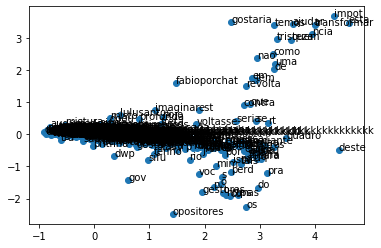

In [ ]:
# Redução dimencional 
# Principal component analysis (PCA).
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# vocabulário
X = model[model.wv.vocab]

# PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
# criando o scatterplo
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# Plotly
* Gráficos interativos
* [https://plotly.com/python/]
* free e opensource, mas há outros produtos da empresa que são pagos

In [ ]:
# pass the embeddings to PCA
# ndArray
X = model[model.wv.vocab]
# Redução linear
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#dataframe para armazenamento dos dados
pca_df = pd.DataFrame(result, columns = ['x','y'])

#add the words for the hover effect
# coluna com os termos
pca_df['word'] = words
pca_df.head()

,x,y,word
0,3.088766,-0.351422,
1,-0.277789,0.029248,onehslt
2,-0.190263,0.010537,loufckside
3,0.671235,-0.113801,oi
4,2.608240,-0.377645,amor


In [ ]:
import plotly.graph_objects as go
#N = 1000000
N = 100000
# vocabulário
words = list(model.wv.vocab)

fig = go.Figure(data=go.Scattergl(
    x = pca_df['x'],
    y = pca_df['y'],
    mode='markers',
    # acrescentar marcadores para melhroar a visualização
    marker=dict(
        color=np.random.randn(N),
        colorscale='Viridis',
        line_width=1
    ),
    text=pca_df['word'],
    textposition="bottom center"
))
fig.show()

In [ ]:
#explore embeddings using cosine similarity
model.wv.most_similar('amor')

[('meu', 0.9971296191215515),
 ('me', 0.9970337152481079),
 ('pelo', 0.99686199426651),
 ('agora', 0.996700644493103),
 ('ele', 0.9966006875038147),
 ('deus', 0.9965015053749084),
 ('ajudem', 0.9964646100997925),
 ('todo', 0.9963861107826233),
 ('quer', 0.9963198304176331),
 ('comigo', 0.9962223768234253)]

In [ ]:
model.wv.most_similar_cosmul(positive = ['amor', 'perdao'], negative = ['vida'])

[('me', 1.0005571842193604),
 ('ajudem', 1.000396490097046),
 ('brasileira', 1.0003924369812012),
 ('falo', 1.0003881454467773),
 ('caro', 1.0003551244735718),
 ('at', 1.0002723932266235),
 ('hora', 1.0002458095550537),
 ('imagina', 1.000167965888977),
 ('coisas', 1.000140905380249),
 ('paz', 1.0000780820846558)]

In [ ]:
model.wv.doesnt_match("perdao odio paz esperanca".split())

'odio'

In [ ]:
#salvar resultados
filename = 'Tweets_Vectors.txt'
model.wv.save_word2vec_format(filename, binary = False)